# Investigate how welfare program affects juveniles medical appointments.

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> This dataset collects information from a hundred thousand medical appointments in Brazil and is focused on the question of whether or not patients show up for their appointment. A number of
characteristics about the patient are included in each row.
><ul>
    <li> ‘ScheduledDay’ tells us on what day the patient set up their appointment.</li>
    <li> ‘Neighborhood’ indicates the location of the hospital.</li>
    <li> ‘Scholarship’ indicates whether or not the patient is enrolled in Brasilian welfare program Bolsa Família.</li></ul> 
> It says ‘No’in the no_show if the patient showed up to their appointment, and ‘Yes’ if they did not show up.


> The questions this analysis answer is
><ul>
    <li> What is the comparison of the juveniles that showed for appointment to those that did not?</li>
    <li> How does the welfare program affect showing or not showing for appoinment for juveniles?</li></ul>

In [1]:
# Importing packages
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
% matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

> In this section of the report, I loaded the data, check for cleanliness, and then trimmed and cleaned the dataset for analysis.
### General Properties

In [2]:
# Loading data and viewing the top 5 rows for each column.

df = pd.read_csv('no_show_appointments_2016.csv')
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


> The cell above shows the top 5 rows in the dataset. The column names will have to be reformatted. 

In [3]:
# This cell is to view some basic information about the dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


### Basic information
> The result above gives general information about the dataset. 
<ul>
    <li> There are 14 columns and 110527 rows in the dataset excluding the header row.</li>
    <li> The column name will need to be formated in the format <i> column_name</i> without the italics.</li>
    <li> There are some columns datatype in <i> int</i> that will be changed to strings(object).
        
    

In [4]:
# Number of duplicated rows in the dataset
df.duplicated().sum()

0

> From the above. there are no duplicated rows in the dataset, which means each row has different data in them.

In [5]:
# Number of duplicated patient identification
df['PatientId'].duplicated().sum()

48228

In [6]:
# Number of unique patients identification
df['PatientId'].nunique()

62299

> The number of unique patients are 62299, which means some the remaining patients appears at least once the dataset.

> However, since there are no duplicated rows in the dataset, the patients that appears more than once will not be dropped.

In [7]:
# Number of missing data in the dataset
df.isna().sum()

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

> The cell above shows that there are no missing data in the dataset.

In [8]:
# Check for age less than 0.
bad_age = df[df['Age'] < 0]
bad_age

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
99832,4.659432e+14,5775010,F,2016-06-06T08:58:13Z,2016-06-06T00:00:00Z,-1,ROMÃO,0,0,0,0,0,0,No


> bad_age shows that there is a patient with an age less than zero which is not possible as human age cannot be negative. The row will be dropped.

### Data Cleaning

> In this section, the data will be cleaned to present a more trimmed and formatted dataset for the analysis stage

In [9]:
# Changing column names to lower case and change hypen to underscore
df.rename(columns=lambda x: x.strip().lower().replace("-", "_"), inplace=True)

# Confirm changes
df.head(1)

,patientid,appointmentid,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no_show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No


In [10]:
# Add underscores between words in column name
df.rename(columns={'patientid':'patient_id', 'appointmentid':'appointment_id', 'scheduledday':'scheduled_day', 'appointmentday':'appointment_day', 'hipertension':'hypertension', 'handcap':'handicap'}, inplace=True)

# Confirm changes
df.head(1)

,patient_id,appointment_id,gender,scheduled_day,appointment_day,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No


> The two cells above formats the column name to lower case and added hyphens betwewn words. It also changed the spelling of hadcap to handicap.

> The reason for formating the column names is to use the .{column name here} notation.

In [11]:
# View dimensions of dataset
df.shape

(110527, 14)

>The cell above gives the dimension of the dataset before some rows and columns are dropped. It shows there are 110527 rows and 14 columns

In [12]:
# Drop patient_id, appointment_id, appointment_day, neighbourhood, scheduled_day columns
df.drop(['appointment_day', 'appointment_id', 'appointment_day', 'neighbourhood', 'scheduled_day'], axis=1, inplace=True)

# Confirm the columns has been dropped
df.head(1)

,patient_id,gender,age,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show
0,2.987250e+13,F,62,0,1,0,0,0,0,No


In [13]:
# Drop row which age is less than 0
df = df[df['age'] >= 0]

# View dimensions of dataset
df.shape

(110526, 10)

> The first cell is used to drop some columns(patient_id, appointment_id, appointment_day, neighbourhood, scheduled_day columns)

> The second cell is used to drop the row which has the age of -1, and the dimension of the cell is given to be 110524 rows (due to the dropping of bad_age


### Inspecting and Fixing datatypes

In [14]:
# Check column datatypes
df.dtypes

patient_id      float64
gender           object
age               int64
scholarship       int64
hypertension      int64
diabetes          int64
alcoholism        int64
handicap          int64
sms_received      int64
no_show          object
dtype: object

In [15]:
# View first rows of dataset
df.head()

,patient_id,gender,age,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show
0,2.987250e+13,F,62,0,1,0,0,0,0,No
1,5.589978e+14,M,56,0,0,0,0,0,0,No
2,4.262962e+12,F,62,0,0,0,0,0,0,No
3,8.679512e+11,F,8,0,0,0,0,0,0,No
4,8.841186e+12,F,56,0,1,1,0,0,0,No


In [16]:
# Convert scholarship, hipertension, diabetes, alcoholism, handcap to booleans
bool_columns = ['scholarship', 'hypertension', 'diabetes', 'alcoholism', 'handicap',]
for c in bool_columns:
   df[c] = df[c].astype(str)
    
# Confirm changes
df.dtypes

patient_id      float64
gender           object
age               int64
scholarship      object
hypertension     object
diabetes         object
alcoholism       object
handicap         object
sms_received      int64
no_show          object
dtype: object

<a id='eda'></a>
## Exploratory Data Analysis

> In this section, I explored the data with the aim of answering the posed questions.

### Compare Juveniles (Age 17 and below) that made the appointment  to those that did not.

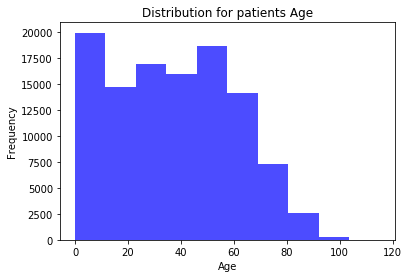

In [17]:
# Plotting distribution for patients age 
age = df.age
header = 'Distribution for patients Age'
ax = age.plot(kind='hist', title=header, color='blue', alpha=.7)
ax.set_xlabel("Age")
ax.set_ylabel("Frequency");


> The above cell plots the distribution of age of the patients.

In [18]:
# Get the juveniles
juveniles = df.query('age <=17')
juveniles.head(1)

,patient_id,gender,age,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show
3,8.679512e+11,F,8,0,0,0,0,0,0,No


In [19]:
# Get the juveniles status on appointment.
juv = juveniles.groupby('no_show').age.value_counts()
juv

no_show  age
No       0      2900
         1      1858
         2      1366
         3      1236
         6      1205
         5      1169
         7      1126
         17     1113
         8      1106
         16     1049
         4      1017
         9      1008
         10      970
         11      948
         15      889
         12      820
         14      802
         13      800
Yes      0       639
         1       415
         17      396
         9       364
         16      353
         15      322
         5       320
         8       318
         6       316
         14      316
         10      304
         13      303
         7       301
         4       282
         3       277
         12      272
         2       252
         11      247
Name: age, dtype: int64

> The cell above shows the count on the age distribution on the juveniles that showed for their medical appointments.

In [20]:
made_it = juveniles.query('no_show == "No"').no_show.value_counts()
made_it

No    21382
Name: no_show, dtype: int64

In [21]:
missed = juveniles.query('no_show == "Yes"').no_show.value_counts()
missed

Yes    5997
Name: no_show, dtype: int64

In [22]:
juv_ratio = 21382 / 5997
juv_ratio

3.565449391362348

> The ratio of the juveniles that made their appointments to those that did not make theirs is 3.5:1


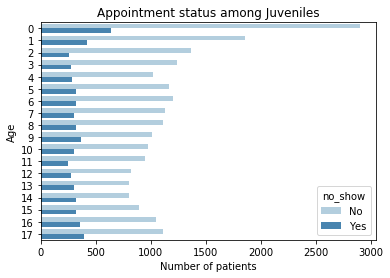

In [23]:
# Plot the juveniles status on whether they showed for appoinments or not
ax = sns.countplot( y='age', hue='no_show', data=juveniles, palette="Blues" )
ax.set(xlabel="Number of patients", ylabel="Age", title="Appointment status among Juveniles"); #Sets title and axes labels


> The above cell shows the comparison on the juveniles that showed for appointment and those that did not for different ages.

### Does having scholarship affect the appointment rate among juveniles?

In [24]:
# Get the juveniles who are not enrolled in the scholarship scheme
no_schsp = juveniles.query('scholarship == "0"').no_show.value_counts()
no_schsp

No     19062
Yes     5255
Name: no_show, dtype: int64

In [25]:
# The ratio of those that made their appointments to those that did not with all patients without scholarship
19062 / 5255

3.6274024738344433

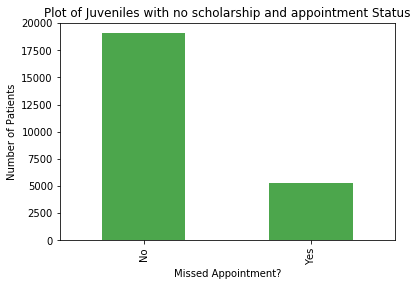

In [26]:
# Plot of juveniles without scholarship and their appointment status (Missed appointment?)
head = 'Plot of Juveniles with no scholarship and appointment Status'
ax = no_schsp.plot(kind='bar', title=head, color='green', alpha=.7)
ax.set_xlabel("Missed Appointment?")
ax.set_ylabel("Number of Patients");

>From the plot above, it can be seen that around 19000 juveniles without scholarship did not miss their appointment while just above 5000 patients missed their appointments, which is in the ratio of around 3.6:1. 

In [27]:
# Get the juveniles who are not enrolled in the scholarship scheme
schsp = juveniles.query('scholarship == "1"').no_show.value_counts()
schsp

No     2320
Yes     742
Name: no_show, dtype: int64

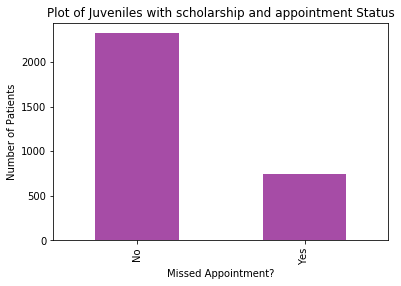

In [28]:
# Plot of juveniles with scholarship and their appointment status (Missed appointment?)
head = 'Plot of Juveniles with scholarship and appointment Status'
ax = schsp.plot(kind='bar', title=head, color='purple', alpha=.7)
ax.set_xlabel("Missed Appointment?")
ax.set_ylabel("Number of Patients");

>The number of patients with scholarships that did not miss appointment is just 2320 while those that missed appoinment is almost 750. The ratio of those with scholarship that made appointment to those that did not make their appointment is just around 3:1

### Limitations

> One limitation of the dataset is that when the duplicated patients identification was removed, the remaining patients identifications made their appointments and no patients missed an appointment which made analyzing the data cumbersome. 

> Another limitation was wrong data, as there was a patient which age was less than one and human age starts from one.

<a id='conclusions'></a>
## Conclusions


>From the charts above, it is seen that those that the majority made their appointments, and also majority are not in the scholarship scheme. 

>Having a scholarship might not necessarily mean a juvenile will make their appointment as the majority of those that made their appointment are not in the scholarship scheme. It should also be stated that juveniles are dependents on adults and that might be a factor in one making or not making their appointment.

